In [204]:
%matplotlib 
import matplotlib.pyplot as plt
import numpy as np
from math import sqrt

# import tunable_coupler as tc

Using matplotlib backend: TkAgg


# Effective g calculation

In [4]:
# import numpy as np

def compute_g_eff(wc, w1, w2, C1, C2, C12, C1c, C2c, Cc):
    """
    w in GHz and C in fF
    """
    eta = C1c*C2c/C12/Cc
    Sigma = 2 / (1/(w1+wc) + 1/(w2+wc))
    Delta = 2/(1/(w1-wc) + 1/(w2-wc))

    g = 1/2*(wc*eta/2/Delta - wc*eta/2/Sigma + eta + 1)* C12/np.sqrt(C1*C2)*np.sqrt(w1*w2)
    
    return g

def compute_g1(wc,w1,C1,C1c,Cc):
    """
    Qubit-coupler coupling strengh in GHz.
    C in fF
    """
    g1 = 1/2*C1c/np.sqrt(C1*Cc)*np.sqrt(w1*wc)
    
    return g1

def compute_g2(wc,w2,C2,C2c,Cc):
    """
    Qubit-coupler coupling strengh in GHz.
    C in fF
    """
    g2 = 1/2*C2c/np.sqrt(C2*Cc)*np.sqrt(w2*wc)
    
    return g2

def compute_g12(w1,w2,C1,C2,C12,C1c,C2c,Cc):
    """
    Qubit-qubit coupling strengh in GHz.
    C in fF
    """
    eta = C1c*C2c/C12/Cc
    g12 = 1/2*(1 + eta)*C12/np.sqrt(C1*C2)*np.sqrt(w1*w2)
    
    return g12


Text(0,0.5,'Coupling, 2g_eff (MHz)')

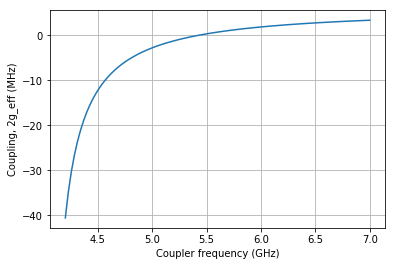

In [165]:
# parameters from Yan's paper
w1, w2 = 4, 4 # in GHz
(C1, C2, C12, C1c, C2c, Cc) = (70,72,0.1,4,4.2,200)

freq_c = np.linspace(4.2, 7, 101)
coupling = g_eff(freq_c,w1,w2,C1, C2,C12,C1c,C2c,Cc)

plt.plot(freq_c, 2*coupling*1e3)
plt.grid('on')
plt.xlabel('Coupler frequency (GHz)')
plt.ylabel('Coupling, 2g_eff (MHz)')

g1=141.4 MHz
g12=9.438 MHz


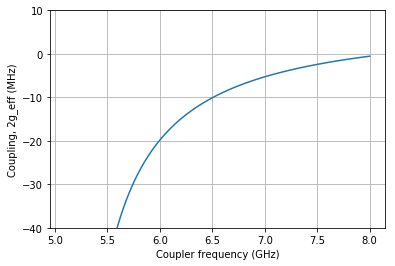

In [166]:
# parameters for IBM qubit
w1, w2 = 5, 5 # in GHz
(C1, C2, C12, C1c, C2c, Cc) = (70,72,0.1,4,4.2,100)
# (C1, C2, C12, C1c, C2c, Cc) = (60,60,0.10,10,14,100)

freq_c = np.linspace(5.1, 8, 101)
geff = compute_g_eff(freq_c,w1,w2,C1, C2,C12,C1c,C2c,Cc)
plt.plot(freq_c, 2*geff*1e3)
plt.grid('on')
plt.xlabel('Coupler frequency (GHz)')
plt.ylabel('Coupling, 2g_eff (MHz)')
plt.ylim(-40, 10)

wc = 7
print(f'g1={compute_g1(wc,w1,C1,C1c,Cc)*1e3:.1f} MHz')
print(f'g12={compute_g12(w1,w2,C1,C2,C12,C1c,C2c,Cc)*1e3:.3f} MHz')

In [167]:
C1c*C2c/C12/Cc

1.68

Text(0,0.5,'Coupling, 2g1 (MHz)')

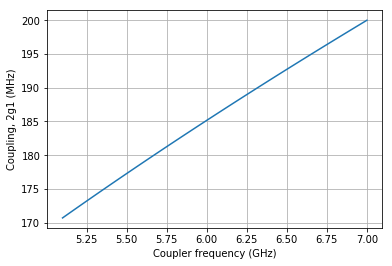

In [168]:
# parameters from Yan's paper
w1, w2 = 5, 5 # in GHz
(C1, C2, C12, C1c, C2c, Cc) = (70,72,0.1,4,4.2,200)

freq_c = np.linspace(5.1, 7, 101)

plt.plot(freq_c, 2*compute_g1(freq_c,w1,C1,C1c,Cc)*1e3)
plt.grid('on')
plt.xlabel('Coupler frequency (GHz)')
plt.ylabel('Coupling, 2g1 (MHz)')

# Transmon with a Duffing model

In [169]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from qutip import *
import sympy

In [170]:
# parameters for IBM qubit
w1 = 5 # in GHz
alpha1 = -0.35 # in GHz

N = 29
b1 = destroy(N)

H = w1*b1.dag()*b1 + alpha1/2.0*b1.dag()*b1.dag()*(b1*b1-qeye(N))
  
# sympy.SparseMatrix(np.round((H)[:, 0:13],2))

/home/jaseung/.local/lib/python3.6/site-packages/numpy/core/_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


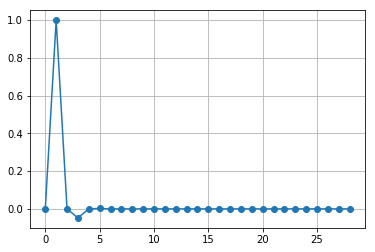

In [171]:
eigen = H.eigenstates()

# for i in range(eigen[1].size):
#     plt.plot(eigen[1][i],'o-') 
plt.plot(eigen[1][1],'o-') 
plt.grid()


/home/jaseung/.local/lib/python3.6/site-packages/numpy/core/_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


(<matplotlib.figure.Figure at 0x7f5e2b71fd30>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f5e2bcd1908>)

/usr/lib/python3/dist-packages/matplotlib/ticker.py:755: ComplexWarning: Casting complex values to real discards the imaginary part
  loc_range_oom = int(math.floor(math.log10(loc_range)))
/usr/lib/python3/dist-packages/matplotlib/ticker.py:779: ComplexWarning: Casting complex values to real discards the imaginary part
  return self.format % xp
/usr/lib/python3/dist-packages/matplotlib/text.py:856: ComplexWarning: Casting complex values to real discards the imaginary part
  y = float(self.convert_yunits(self._y))
/usr/lib/python3/dist-packages/matplotlib/text.py:721: ComplexWarning: Casting complex values to real discards the imaginary part
  posy = float(textobj.convert_yunits(textobj._y))


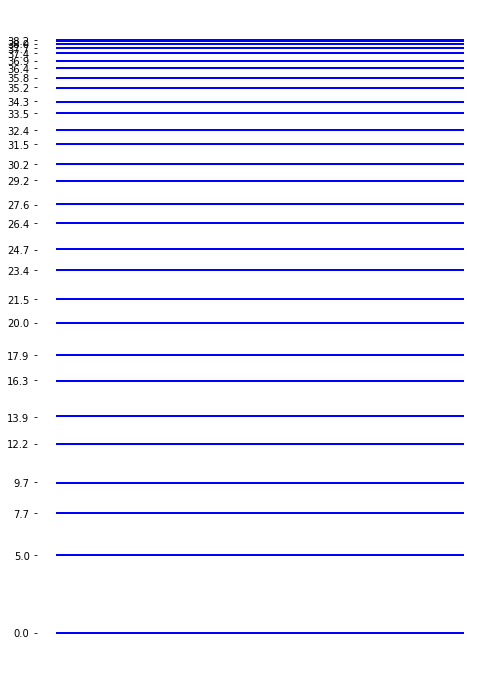

In [172]:
plot_energy_levels([H], show_ylabels=True)

# ZZ calculation by diagonalizing effective two-qubit Hamiltonian
Ref: Yan et al., PRApplied 2018

In [5]:
%matplotlib 
import matplotlib.pyplot as plt
import numpy as np
from math import pi
from qutip import *
import sympy

Using matplotlib backend: TkAgg


In [198]:
def hamiltonian_diag_eff(w1,w2,wc,C1,C2,C12,C1c,C2c,Cc,alpha1,alpha2,N):
    b1 = destroy(N)
    b2 = destroy(N)

    w1_dr = w1 + compute_g1(wc,w1,C1,C1c,Cc)**2 * (1/(w1-wc)-1/(w1+wc))
    w2_dr = w2 + compute_g2(wc,w2,C1,C1c,Cc)**2 * (1/(w2-wc)-1/(w2+wc))
    geff = compute_g_eff(wc, w1, w2, C1, C2, C12, C1c, C2c, Cc)

    # Eq. B2
    H_eff1 = ( w1_dr*tensor(b1.dag()*b1,qeye(N)) + alpha1/2.0*tensor(b1.dag()*b1.dag()*b1*b1, qeye(N))
        + w2_dr*tensor(qeye(N),b2.dag()*b2) + alpha2/2.0*tensor(qeye(N), b2.dag()*b2.dag()*b2*b2)
        + geff * (tensor(b1.dag(),b2) + tensor(b1, b2.dag())))

    return H_eff1

In [207]:
# parameters for IBM qubit
w1, w2 = 5, 5.2 # in GHz
wc = 6
(C1, C2, C12, C1c, C2c, Cc) = (70,72,0.1,4,4.2,200)

alpha1 = -0.35 # in GHz
alpha2 = -0.35

N = 10

# compute Hamiltonian
H_eff1 = hamiltonian_diag_eff(w1,w2,wc,C1,C2,C12,C1c,C2c,Cc,alpha1,alpha2,N)
eigen1 = H_eff1.eigenstates()

sympy.SparseMatrix(np.round((H_eff1)[:, 0:13],2))
print(f'g1={compute_g1(wc,w1,C1,C1c,Cc)*1e3:.1f} MHz')
print(f'g12={compute_g12(w1,w2,C1,C2,C12,C1c,C2c,Cc)*1e3:.3f} MHz')
print(f'geff={compute_g_eff(wc,w1,w2,C1,C2,C12,C1c,C2c,Cc)*1e3:.3f} MHz')

# Compute eigenvalues and find $\zeta = \omega_{11}-\omega_{01}-\omega_{10}$
ZZ = eigen1[0][5] - eigen1[0][1] - eigen1[0][2]  # in GHz
print(f'ZZ = {ZZ*1e3:.2f} (MHz)')

g1=92.6 MHz
g12=6.608 MHz
geff=-4.389 MHz
ZZ = 0.32 (MHz)


In [101]:
# compute eigenvalues and eigenstates.
eigen1 = H_eff1.eigenstates()  # eigen is a tuble with two elements. eigen[0] = eigenvalues, eigen[1]=eigenstates.
eigen1[1][5].full()

array([[ 0.        +0.j],
       [ 0.        +0.j],
       [ 0.06505539+0.j],
       [ 0.        +0.j],
       [ 0.        +0.j],
       [ 0.        +0.j],
       [ 0.        +0.j],
       [ 0.        +0.j],
       [ 0.        +0.j],
       [ 0.        +0.j],
       [ 0.        +0.j],
       [-0.99717586+0.j],
       [ 0.        +0.j],
       [ 0.        +0.j],
       [ 0.        +0.j],
       [ 0.        +0.j],
       [ 0.        +0.j],
       [ 0.        +0.j],
       [ 0.        +0.j],
       [ 0.        +0.j],
       [ 0.03752459+0.j],
       [ 0.        +0.j],
       [ 0.        +0.j],
       [ 0.        +0.j],
       [ 0.        +0.j],
       [ 0.        +0.j],
       [ 0.        +0.j],
       [ 0.        +0.j],
       [ 0.        +0.j],
       [ 0.        +0.j],
       [ 0.        +0.j],
       [ 0.        +0.j],
       [ 0.        +0.j],
       [ 0.        +0.j],
       [ 0.        +0.j],
       [ 0.        +0.j],
       [ 0.        +0.j],
       [ 0.        +0.j],
       [ 0. 

## (ZZ, g_eff) vs Coupler Frequency

In [245]:
# parameters for IBM qubit
w1, w2 = 5, 5.2 # in GHz
wc = 5.5
(C1, C2, C12, C1c, C2c, Cc) = (70,72,0.2,3,3.2, 60)
alpha1 = -0.35 # in GHz
alpha2 = -0.35

# w1, w2 = 4.961, 4.926 # in GHz
# wc = 5.5
# (C1, C2, C12, C1c, C2c, Cc) = (70,72,0.13,2.4,2.4,100)
# alpha1 = -0.206 # in GHz
# alpha2 = -0.202


N = 5

# sweep
wc_list = np.linspace(5.5,7.5,31)
ZZ_list, g_eff_list, g1_list, g2_list, g12_list = [], [], [], [], []
ev_list = []

for wc in wc_list:
    H_eff = hamiltonian_diag_eff(w1,w2,wc,C1,C2,C12,C1c,C2c,Cc,alpha1,alpha2,N)
    eigen = H_eff.eigenstates()
    ev_list.append(eigen[1][5])
    ZZ = (eigen[0][5] - eigen[0][1] - eigen[0][2])*1e3  # in MHz
    
    ZZ_list.append(ZZ)
    g_eff_list.append(compute_g_eff(wc,w1,w2,C1,C2,C12,C1c,C2c,Cc)*1e3)
    g1_list.append(compute_g1(wc,w1,C1,C1c,Cc)*1e3)
    g2_list.append(compute_g2(wc,w2,C1,C1c,Cc)*1e3)
    g12_list.append(compute_g12(w1,w2,C1,C2,C12,C1c,C2c,Cc)*1e3)
    
   
# plot
fig,(ax,ax1, ax2) = plt.subplots(3,1, figsize=(10,10))
ax.plot(wc_list, ZZ_list,'-o')
# ax.set_xlabel('Coupler Frequency (GHz)', fontsize=18)
ax.set_ylabel(r'$\zeta$ (MHz)', fontsize=18)
ax.tick_params(axis='x', labelsize=18)
ax.tick_params(axis='y', labelsize=18)
ax.grid('on')

ax1.plot(wc_list, g_eff_list,'-o')
ax1.plot(wc_list, g12_list,'-o')
ax1.set_ylabel(r'$g_{eff}, g_{12}$ (MHz)', fontsize=18)
ax1.tick_params(axis='x', labelsize=18)
ax1.tick_params(axis='y', labelsize=18)
ax1.grid('on')

ax2.plot(wc_list, g1_list,'-o')
ax2.plot(wc_list, g2_list,'-o')
ax2.set_xlabel('Coupler Frequency (GHz)', fontsize=18)
ax2.set_ylabel(r'$g_1, g_2$ (MHz)', fontsize=18)
ax2.tick_params(axis='x', labelsize=18)
ax2.tick_params(axis='y', labelsize=18)
ax2.grid('on')

In [144]:
max_arg = []
for ev in ev_list:
    max_arg.append(np.argmax(np.absolute(ev.full())))

In [186]:
max_arg

[6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6]

In [156]:
eigen[1][5].full()

array([[0.        +0.j],
       [0.        +0.j],
       [0.09995332+0.j],
       [0.        +0.j],
       [0.        +0.j],
       [0.        +0.j],
       [0.99487785+0.j],
       [0.        +0.j],
       [0.        +0.j],
       [0.        +0.j],
       [0.01507939+0.j],
       [0.        +0.j],
       [0.        +0.j],
       [0.        +0.j],
       [0.        +0.j],
       [0.        +0.j],
       [0.        +0.j],
       [0.        +0.j],
       [0.        +0.j],
       [0.        +0.j],
       [0.        +0.j],
       [0.        +0.j],
       [0.        +0.j],
       [0.        +0.j],
       [0.        +0.j]])

# two transmons + Coupler

In [251]:
def hamiltonian_eff(w1,w2,wc,C1,C2,C12,C1c,C2c,Cc,alpha1,alpha2,alphac,N):
    g1 = compute_g1(wc,w1,C1,C1c,Cc)
    g2 = compute_g2(wc,w2,C1,C1c,Cc)
    g12 = compute_g12(w1,w2,C1,C2,C12,C1c,C2c,Cc)

    b1 = destroy(N)
    b2 = destroy(N)
    bc = destroy(N)
    I1 = qeye(N)
    I2 = qeye(N)
    Ic = qeye(N)

    # Eq. A17
    H1 = w1*tensor(b1.dag()*b1, I2, Ic) + alpha1/2.0*tensor(b1.dag()*b1.dag()*b1*b1, I2, Ic)
    H2 = w2*tensor(I1, b2.dag()*b2, Ic) + alpha2/2.0*tensor(I1, b2.dag()*b2.dag()*b2*b2, Ic)
    Hc = wc*tensor(I1, I2, bc.dag()*bc) + alphac/2.0*tensor(I1, I2, bc.dag()*bc.dag()*bc*bc)
    H1c = g1*(tensor(b1.dag(), I2, bc) + tensor(b1, I2, bc.dag())) #- tensor(b1.dag(), I2, bc.dag()) -tensor(b1, I2, bc))
    H2c = g2*(tensor(I1, b2.dag(), bc) + tensor(I1, b2, bc.dag())) #- tensor(I1, b2.dag(), bc.dag()) -tensor(I1, b2, bc))
    H12 = g12*(tensor(b1.dag(), b2, Ic) + tensor(b1, b2.dag(), Ic)) # - tensor(b1.dag(), b2.dag(), Ic) -tensor(b1, b2, Ic))
    
    H_eff = H1 + H2 + Hc + H1c + H2c + H12
    
    return H_eff

In [229]:
# parameters for IBM qubit
w1, w2, wc = 5, 5, 6 # in GHz
(C1, C2, C12, C1c, C2c, Cc) = (70,72,0.1,4,4.2,150)
alpha1, alpha2, alphac = -0.35, -0.35, -0.35# in GHz
N=5

H_eff2 = hamiltonian_eff(w1,w2,wc,C1,C2,C12,C1c,C2c,Cc,alpha1,alpha2,alphac,N)

sympy.SparseMatrix(np.round((H_eff2)[:, 0:13],2))
print(f'g1={g1*1e3:.2f} MHz')
print(f'g12={g12*1e3:.3f} MHz')
print(f'geff={compute_g_eff(wc,w1,w2,C1,C2,C12,C1c,C2c,Cc)*1e3:.3f} MHz')

# Compute eigenvalues and find $\zeta = \omega_{11}-\omega_{01}-\omega_{10}$
eigen2 = H_eff2.eigenstates()
ZZ = eigen2[0][6] - eigen2[0][1] - eigen2[0][2]  # in GHz
print(f'ZZ = {ZZ*1e3:.5f} (MHz)')

g1=106.90 MHz
g12=7.466 MHz
geff=-5.442 MHz
ZZ = 2.03818 (MHz)


In [167]:
len(eigen1[0])

125

In [34]:
# eigen1[1][5].full()

In [12]:
plot_energy_levels([H_eff2], N=7, show_ylabels=True)

(<matplotlib.figure.Figure at 0x7f2259de5dd8>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f225cf6be80>)

## (ZZ, gs) vs Coupler frequency

In [269]:
# parameters for IBM qubit
w1, w2 = 5, 5.2 # in GHz
wc = 5.5
(C1, C2, C12, C1c, C2c, Cc) = (60,60,0.1,2,2, 50)
alpha1 = -0.35 # in GHz
alpha2 = -0.35
alphac = -0.40

N = 5

# sweep
wc_list = np.linspace(5.5,7.5,31)
ZZ_list, g_eff_list, g1_list, g2_list, g12_list = [], [], [], [], []
ev_list = []

for wc in wc_list:
    H_eff = hamiltonian_eff(w1,w2,wc,C1,C2,C12,C1c,C2c,Cc,alpha1,alpha2,alphac,N)
    eigen = H_eff.eigenstates()
    ev_list.append(eigen[1][6])
    ZZ = (eigen[0][6] - eigen[0][1] - eigen[0][2])*1e3  # in MHz
    
    ZZ_list.append(ZZ)
    g_eff_list.append(compute_g_eff(wc,w1,w2,C1,C2,C12,C1c,C2c,Cc)*1e3)
    g1_list.append(compute_g1(wc,w1,C1,C1c,Cc)*1e3)
    g2_list.append(compute_g2(wc,w2,C1,C1c,Cc)*1e3)
    g12_list.append(compute_g12(w1,w2,C1,C2,C12,C1c,C2c,Cc)*1e3)
    
   
# plot
fig,(ax,ax1, ax2) = plt.subplots(3,1, figsize=(10,10))
ax.plot(wc_list, ZZ_list,'-o')
# ax.set_xlabel('Coupler Frequency (GHz)', fontsize=18)
ax.set_ylabel(r'$\zeta$ (MHz)', fontsize=18)
ax.tick_params(axis='x', labelsize=18)
ax.tick_params(axis='y', labelsize=18)
ax.grid('on')

ax1.plot(wc_list, g_eff_list,'-o')
ax1.plot(wc_list, g12_list,'-o')
ax1.set_ylabel(r'$g_{eff}, g_{12}$ (MHz)', fontsize=18)
ax1.tick_params(axis='x', labelsize=18)
ax1.tick_params(axis='y', labelsize=18)
ax1.grid('on')

ax2.plot(wc_list, g1_list,'-o')
ax2.plot(wc_list, g2_list,'-o')
ax2.set_xlabel('Coupler Frequency (GHz)', fontsize=18)
ax2.set_ylabel(r'$g_1, g_2$ (MHz)', fontsize=18)
ax2.tick_params(axis='x', labelsize=18)
ax2.tick_params(axis='y', labelsize=18)
ax2.grid('on')

In [ ]:
# np.argmax(np.absolute(eigen[1][9].full()))

In [241]:
max_arg = []
for ev in ev_list:
    max_arg.append(np.argmax(np.absolute(ev.full())))
max_arg

[30,
 30,
 30,
 30,
 30,
 30,
 30,
 30,
 30,
 30,
 30,
 30,
 30,
 30,
 30,
 30,
 30,
 30,
 30,
 30,
 30,
 30,
 30,
 30,
 30,
 30,
 30,
 30,
 30,
 30,
 30]

# Compare eff. Hamil. vs diag. eff. Hamil.

In [119]:
# parameters for IBM qubit
w1, w2 = 5, 5 # in GHz
wc = 5.5
(C1, C2, C12, C1c, C2c, Cc) = (70,72,0.1,4,4.2,150)
alpha1 = -0.35 # in GHz
alpha2 = -0.35

N = 5
eigen1 = hamiltonian_eff(w1,w2,wc,C1,C2,C12,C1c,C2c,Cc,alpha1,alpha2,N).eigenstates()
eigen2 = hamiltonian_diag_eff(w1,w2,wc,C1,C2,C12,C1c,C2c,Cc,alpha1,alpha2,N).eigenstates()

plt.figure()
plt.plot(eigen1[0],'-o', label='Effective two-transmons Hamil.')
plt.plot(eigen2[0],'-o', label='Diganal effective two-transmons Hamil.')
plt.legend()
plt.grid()

In [258]:
from scipy.constants import e,h


In [265]:
e**2/2/60*1e15/h/1e6

322.83715541098536

In [261]:
C1

70